## ECSE415 Part 2

In [50]:
!pip install statistics
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn
import pandas as pd
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from numpy import genfromtxt
import csv
from statistics import mean 
# from google.colab import drive
# from google.colab import files
# drive.mount('/content/drive')

  Running setup.py bdist_wheel for statistics ... done
  Stored in directory: /Users/karinemellata/Library/Caches/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
Successfully built statistics
spyder-kernels 1.4.0 requires wurlitzer, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
grin 1.2.1 requires argparse>=1.1, which is not installed.
automat 20.2.0 has requirement attrs>=19.2.0, but you'll have attrs 18.1.0 which is incompatible.
You are using pip version 10.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[151, 123, 102],
        [151, 123, 102],
        [151, 123, 102],
        ...,
        [204, 162, 120],
        [207, 166, 122],
        [207, 166, 120]],

       [[150, 122, 101],
        [150, 122, 101],
        [150, 122, 101],
        ...,
        [194, 153, 109],
        [198, 157, 111],
        [201, 160, 114]],

       [[153, 125, 104],
        [153, 125, 104],
        [152, 124, 103],
        ...,
        [180, 139,  95],
        [181, 140,  94],
        [181, 141,  92]]

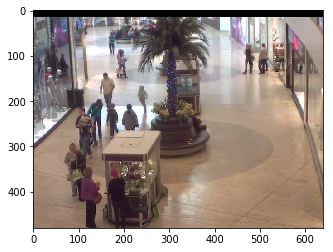

In [86]:
def read_image(number, display=False):
    path = './frames/frames/seq_{}.jpg'.format(str(number).zfill(6))
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if display:
        plt.imshow(img)
    return img
        
read_image(22, display=True)

In [87]:
frames = []
for i in range(1, 2001):
    frames.append(read_image(i))

In [88]:
print(len(frames))

2000


In [89]:
people_boxes = genfromtxt('./people_rectangles.csv', dtype=int, delimiter=',', skip_header=1)

In [90]:
list_boxes = []
for b in people_boxes:
    idx, x, y, w, h = b
    img = frames[idx-1]
    cropped_img = img[y:y+h,x:x+w]
    list_boxes.append(cropped_img)

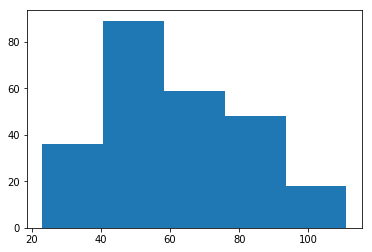

61.5


In [91]:
height = [list_boxes[i].shape[0] for i in range(0, 250)]
plt.hist(height, bins=5) 
plt.show()
print(mean(height))

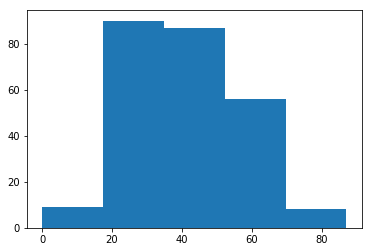

40.724


In [92]:
width = [list_boxes[i].shape[1] for i in range(0, 250)]
plt.hist(width, bins=5) 
plt.show()
print(mean(width))

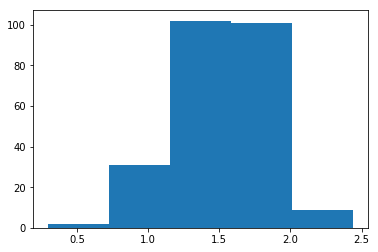

1.5239100335


In [93]:
# Shape distribution
# Maping 100 height to width ratio
ratios = [(float) (list_boxes[i].shape[0])/(list_boxes[i].shape[1]) for i in range(0, 250) if (list_boxes[i].shape[1]) != 0]
plt.hist(ratios, bins=5) 
plt.show()
print(mean(ratios))

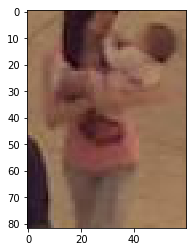

In [94]:
plt.imshow(list_boxes[3])

In [95]:
resized_imgs = []
dim = (40, 60)
resized_img = cv2.resize(list_boxes[1], dim, interpolation = cv2.INTER_AREA)
for l in list_boxes:
    if l.any():
        resized_img = cv2.resize(l, dim, interpolation = cv2.INTER_AREA)
        resized_imgs.append(resized_img)

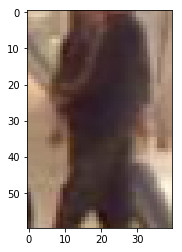

In [96]:
plt.imshow(resized_imgs[50])

In [101]:
def create_negatives():
  negatives=[]
  for n in range(0, 2000):
    for y in range(0, frames[n].shape[0]-20,60):
      for x in range(0, frames[n].shape[1]-20,40):
        for box in people_boxes:
          if(box[0] < n):
            continue
          if((box[0] == n) and (x >= box[1] - 39) and (x <= box[1] + box[3]) and (y >= box[2] - 59) and (y <= box[2] + box[4])):
            break
          elif (box[0] == n+1):
            negatives.append([n+1,x,y,40,60])
            break;
    if(n > 0 and n % 100 == 0):
      print(str(n) + 'th frame')
  
  with open('negative_rectangles.csv', 'w') as fp:
    writer = csv.writer(fp)
    writer.writerow(['image_id', 'x', 'y', 'w', 'h'])
    writer.writerows(negatives)

In [102]:
create_negatives()
files.download('./negative_rectangles.csv')

100th frame
200th frame
300th frame
400th frame
500th frame
600th frame
700th frame
800th frame
900th frame
1000th frame
1100th frame
1200th frame
1300th frame
1400th frame
1500th frame
1600th frame
1700th frame
1800th frame
1900th frame


NameError: name 'files' is not defined

In [98]:
non_people_boxes = genfromtxt('./negative_rectangles.csv', dtype=int, delimiter=',', skip_header=1)

In [11]:
negative_boxes = []
for b in non_people_boxes:
    idx, x, y, w, h = b
    img = frames[idx-1]
    cropped_img = img[y:y+h,x:x+w]
    negative_boxes.append(cropped_img)

In [100]:
negative_boxes[574].shape

(50, 50, 3)